In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset
file_path = r"C:\Users\USER\OneDrive\Desktop\DATA SCIENCE PROJECTS\weight prediction model\gym_members_exercise_tracking.csv"
data=pd.read_csv(file_path)

In [3]:
print(data.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [4]:
print(data.tail())

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experienc

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
print(data.describe())

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

In [7]:
#data cleaning
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
968    False
969    False
970    False
971    False
972    False
Length: 973, dtype: bool


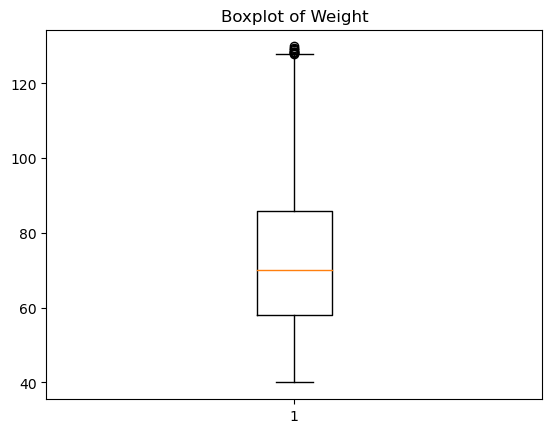

In [8]:
#outlier detection and handling
plt.boxplot(data['Weight (kg)'])
plt.title('Boxplot of Weight')
plt.show()

In [9]:
# Handle outliers using IQR
Q1 = data['Weight (kg)'].quantile(0.25)
Q3 = data['Weight (kg)'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [11]:
# Filter out outliers
data = data[(data['Weight (kg)'] >= lower_bound) & (data['Weight (kg)'] <= upper_bound)]

In [12]:
print(data.dtypes)

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


In [13]:
# Convert Gender to categorical if necessary
data['Gender'] = data['Gender'].astype('category')
data['Workout_Type'] = data['Workout_Type'].astype('category')

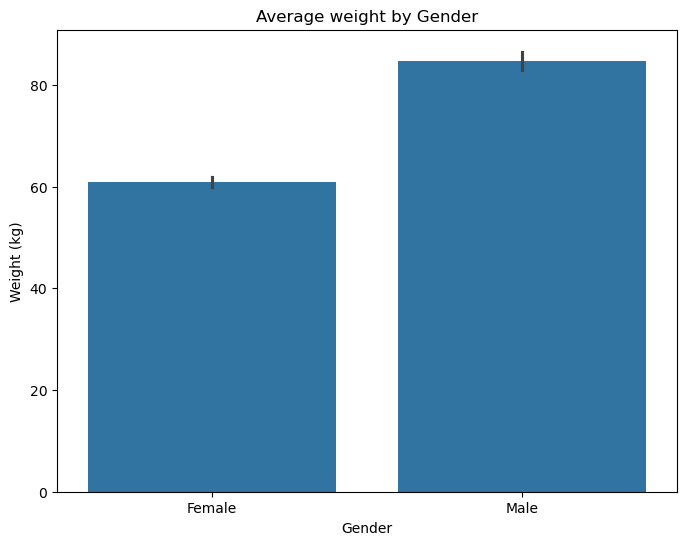

In [16]:
#Bar plot for gender and weight
plt.figure(figsize=(8,6))
sns.barplot(x=data['Gender'],y=data['Weight (kg)'])
plt.title("Average weight by Gender")
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()

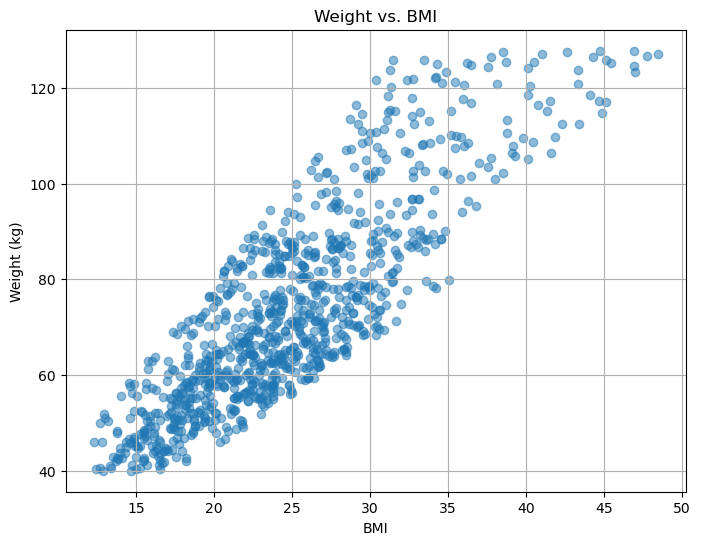

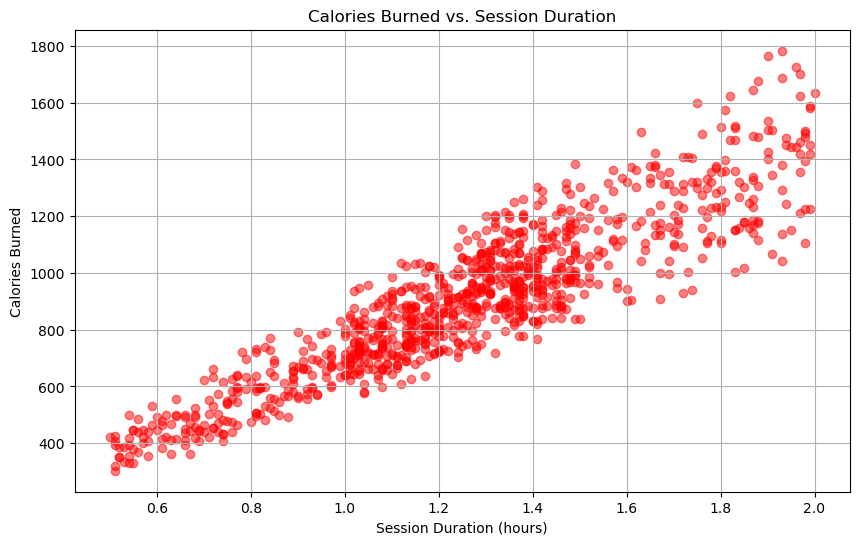

In [20]:
# Scatter Plot: Weight vs. BMI
plt.figure(figsize=(8, 6))
plt.scatter(data["BMI"], data["Weight (kg)"], alpha=0.5)
plt.title("Weight vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()

# Scatter Plot: Calories Burned vs. Session Duration
plt.figure(figsize=(10, 6))
plt.scatter(data["Session_Duration (hours)"], data["Calories_Burned"], alpha=0.5, color='red')
plt.title("Calories Burned vs. Session Duration")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.show()

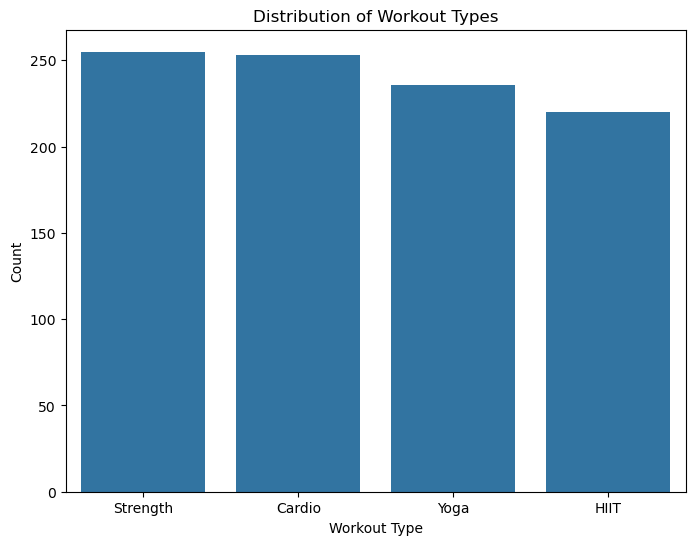

In [24]:
# Count plot for Workout Type
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Workout_Type'], order=data['Workout_Type'].value_counts().index)
plt.title('Distribution of Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.show()

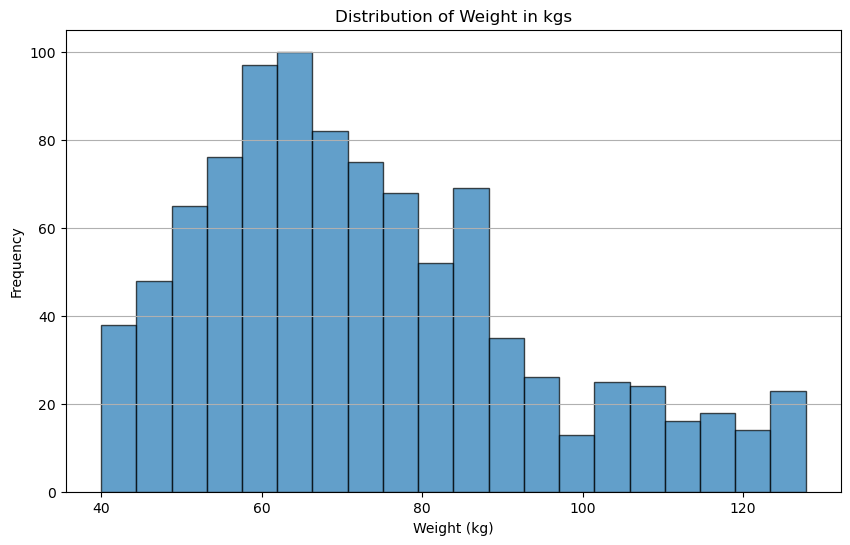

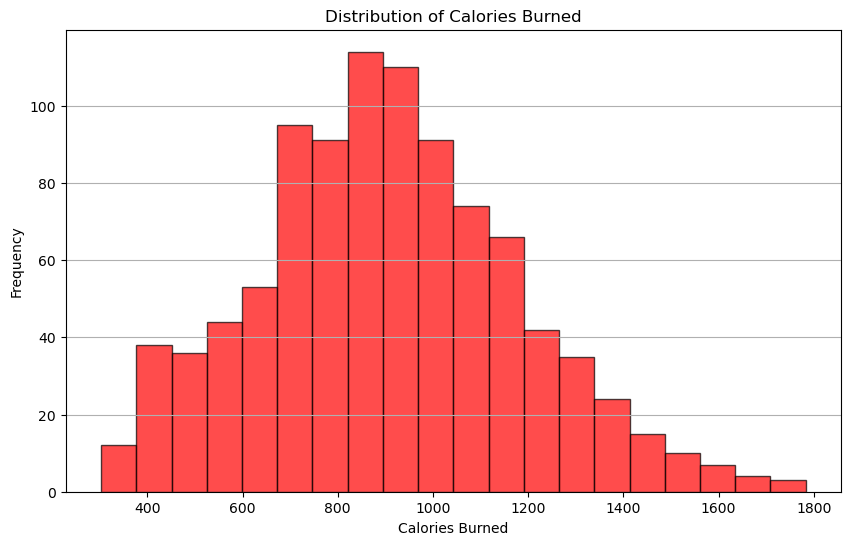

In [22]:
# Histogram: Distribution of Weight
plt.figure(figsize=(10, 6))
plt.hist(data["Weight (kg)"], bins=20, edgecolor="black", alpha=0.7)
plt.title("Distribution of Weight in kgs")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

# Histogram: Distribution of Calories Burned
plt.figure(figsize=(10, 6))
plt.hist(data["Calories_Burned"], bins=20, edgecolor="black", alpha=0.7, color='red')
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


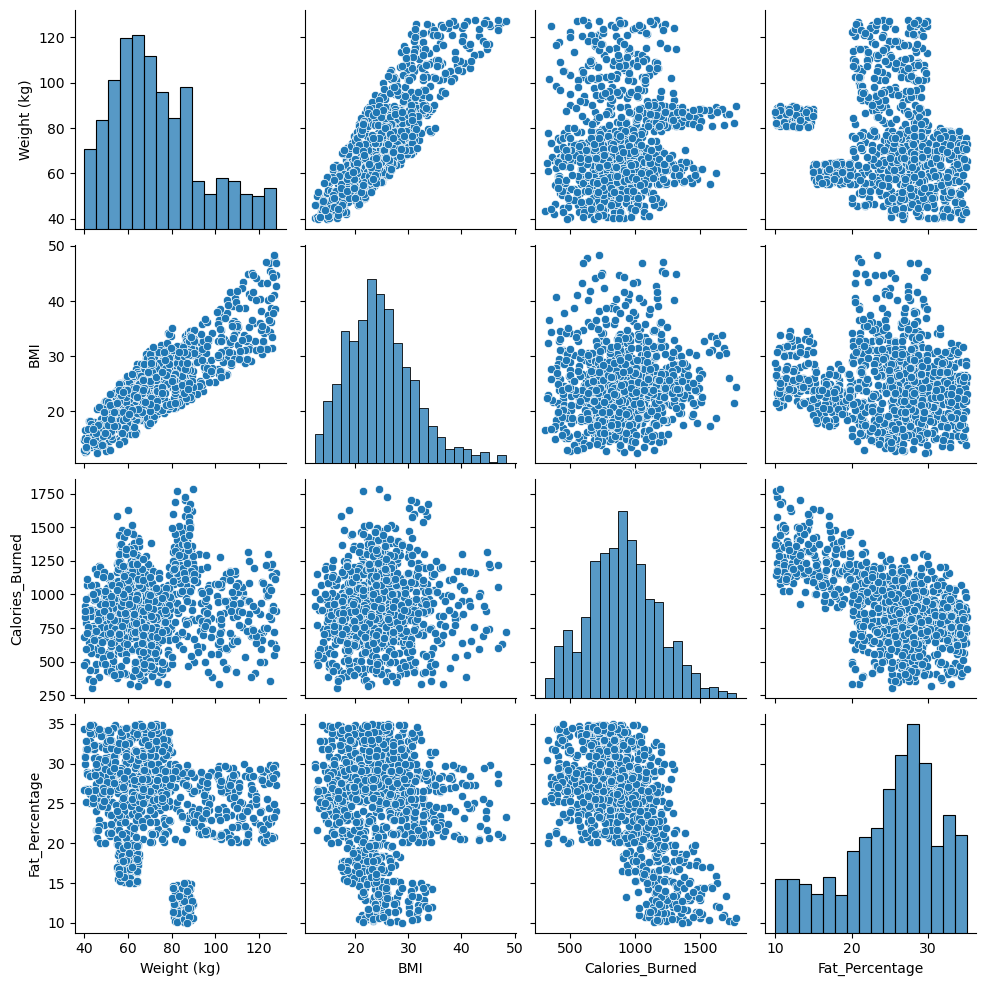

In [25]:
# Pair plot for selected features
sns.pairplot(data[['Weight (kg)', 'BMI', 'Calories_Burned', 'Fat_Percentage']])
plt.show()


In [1]:
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")
print(os.listdir())

Current working directory: C:\Users\USER
['.anaconda', '.bash_history', '.conda', '.condarc', '.continuum', '.git', '.gitconfig', '.gitignore', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.lesshst', '.matplotlib', '.ms-ad', '.node_repl_history', '.viminfo', '.vscode', 'anaconda3', 'AppData', 'Application Data', 'CAT3.ipynb', 'climate_env', 'Contacts', 'Cookies', 'Credit card approval system', 'Documents', 'Downloads', 'Favorites', 'Gym membership analysis.ipynb', 'IntelGraphicsProfiles', 'learning.py', 'Links', 'Local Settings', 'Microsoft', 'Music', 'My Documents', 'MyPortfolio-vCard', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'path_to_save_model.pkl', 'PrintHood', 'python_assig

In [2]:
new_dir = "C:\\Users\\USER\\OneDrive\\Desktop\\DATA SCIENCE PROJECTS\\weight prediction model"
os.chdir(new_dir)

# Verify the change
new_dir = os.getcwd()
print(f"New working directory: {new_dir}") 

New working directory: C:\Users\USER\OneDrive\Desktop\DATA SCIENCE PROJECTS\weight prediction model


In [3]:
print(os.listdir())

['.git', 'gym_members_exercise_tracking.csv']


In [4]:
import os

# Check if the folder exists
new_dir = r"C:\Users\USER\OneDrive\Desktop\DATA SCIENCE PROJECTS\weight prediction model"
if os.path.exists(new_dir):
    print(f"The folder exists: {new_dir}")
else:
    print(f"The folder does NOT exist: {new_dir}")


The folder exists: C:\Users\USER\OneDrive\Desktop\DATA SCIENCE PROJECTS\weight prediction model


In [5]:
print(os.getcwd())


C:\Users\USER\OneDrive\Desktop\DATA SCIENCE PROJECTS\weight prediction model


In [6]:
print(os.listdir())


['.git', 'gym_members_exercise_tracking.csv']


In [7]:
import os

# Current working directory
new_dir = r"C:\Users\USER\OneDrive\Desktop\DATA SCIENCE PROJECTS\weight prediction model"
os.chdir(new_dir)

# List contents
print("Contents of the directory:", os.listdir())

# Try reading the CSV file
import pandas as pd
csv_file = "gym_members_exercise_tracking.csv"

if os.path.exists(csv_file):
    data = pd.read_csv(csv_file)
    print(f"Successfully loaded {csv_file} with {len(data)} rows.")
else:
    print(f"{csv_file} does not exist in the directory.")


Contents of the directory: ['.git', 'gym_members_exercise_tracking.csv']
Successfully loaded gym_members_exercise_tracking.csv with 973 rows.
